In [ ]:
#To zadanie trzeba jeszcze dopracowac, a najlepiej sie dopytac
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

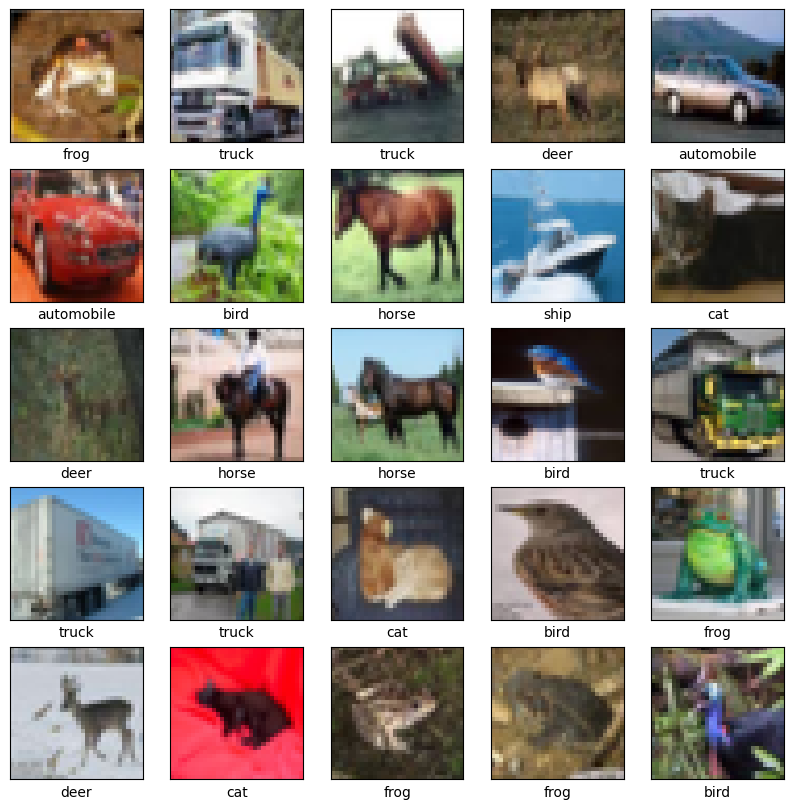

In [ ]:
plt.figure(figsize=[10,10])
for i in range (25): # pierwsze 25 obrazków
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])


In [ ]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
#Normalizacja
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
#Przygotowanie modelu

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

In [ ]:
model = Sequential([
    Conv2D(64, (3,3), input_shape=(32, 32, 3), activation='relu'), #30x30
    MaxPooling2D((2,2)),  #15x15
    Conv2D(128, (3,3), activation='relu'), #13x13
    MaxPooling2D((2,2)),  #6x6
    Conv2D(256, (3,3), activation='relu'), #4x4
    MaxPooling2D((2,2)), #2x2
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    #Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 256)         0

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=5,
                    batch_size=32,
                    verbose=1)

Epoch 1/5
1563/1563 [==============================] - 132s 83ms/step - loss: 1.4521 - accuracy: 0.4667 - val_loss: 1.0996 - val_accuracy: 0.6067
Epoch 2/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.0150 - accuracy: 0.6401 - val_loss: 0.9562 - val_accuracy: 0.6690
Epoch 3/5
1563/1563 [==============================] - 127s 81ms/step - loss: 0.8299 - accuracy: 0.7089 - val_loss: 0.8356 - val_accuracy: 0.7104
Epoch 4/5
1563/1563 [==============================] - 132s 84ms/step - loss: 0.7046 - accuracy: 0.7545 - val_loss: 0.8816 - val_accuracy: 0.7034
Epoch 5/5
1563/1563 [==============================] - 127s 81ms/step - loss: 0.6059 - accuracy: 0.7859 - val_loss: 0.8518 - val_accuracy: 0.7196


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [ ]:
model.evaluate(test_images, test_labels, batch_size=64)

157/157 [==============================] - 6s 37ms/step - loss: 0.8518 - accuracy: 0.7196


[0.8518404364585876, 0.7196000218391418]

In [ ]:
predict_x_train = model.predict(train_images)
y_result_train = np.argmax(predict_x_train,axis=1)

predict_x_test = model.predict(test_images)
y_result_test = np.argmax(predict_x_test,axis=1)

train_err = np.sum(y_result_train != np.argmax(train_labels, axis=1))
test_err = np.sum(y_result_test != np.argmax(test_labels, axis=1))

print(f'Liczba blednie sklasyfikowanych probek dla zbioru treningowego: {train_err}')
print(f'Liczba blednie sklasyfikowanych probek dla zbioru testowego: {test_err}')

313/313 [==============================] - 6s 20ms/step
Liczba blednie sklasyfikowanych probek dla zbioru treningowego: 8625
Liczba blednie sklasyfikowanych probek dla zbioru testowego: 2804


In [ ]:
y_pred = model.predict(train_images)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(train_labels, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(train_labels, axis=1),
y_pred_rounded, average='macro')
recall = recall_score(np.argmax(train_labels, axis=1), y_pred_rounded,
average='macro')
conf_matrix = confusion_matrix(np.argmax(train_labels, axis=1),
y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

1563/1563 [==============================] - 31s 20ms/step
Accuracy: 0.8275
Precision: 0.8365862049193474
Recall: 0.8365862049193474
Confusion Matrix:
 [[4111   46  170   99   94   54   21   36  158  211]
 [   9 4504   17   15   11   48   14   10   20  352]
 [ 132   11 3919  187  305  245  107   50   18   26]
 [  17    1  245 3072  225 1202   84   97   12   45]
 [  34    0  191  119 4323  162   42  112    7   10]
 [   4    0  187  364  208 4068   32  116    6   15]
 [   4    7  185  234  192  199 4136   17    7   19]
 [   7    0  110   80  271  365    6 4128    2   31]
 [ 143   61   65   93   20   71   25    7 4354  161]
 [  39   60   17   31   16   33    8   12   24 4760]]


In [ ]:
y_pred = model.predict(test_images)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(test_labels, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(test_labels, axis=1), y_pred_rounded, average='macro')
recall = recall_score(np.argmax(test_labels, axis=1), y_pred_rounded, average='macro')
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

313/313 [==============================] - 6s 19ms/step
Accuracy: 0.7196
Precision: 0.7319548196897229
Recall: 0.7319548196897229
Confusion Matrix:
 [[716  22  53  35  24  14  10   8  59  59]
 [ 12 815   9   9   5  16   4   1  12 117]
 [ 35   6 640  66  87  84  45  14  10  13]
 [  9   3  67 476  89 262  30  37   4  23]
 [ 10   3  72  48 728  54  29  45   7   4]
 [  7   2  62 108  57 707  10  34   3  10]
 [  3   2  62  61  55  57 738  10   7   5]
 [ 11   1  29  25  97 110   0 713   3  11]
 [ 48  19  16  25  10  25   9   4 799  45]
 [ 17  35  11  14   8  16   5  14  16 864]]


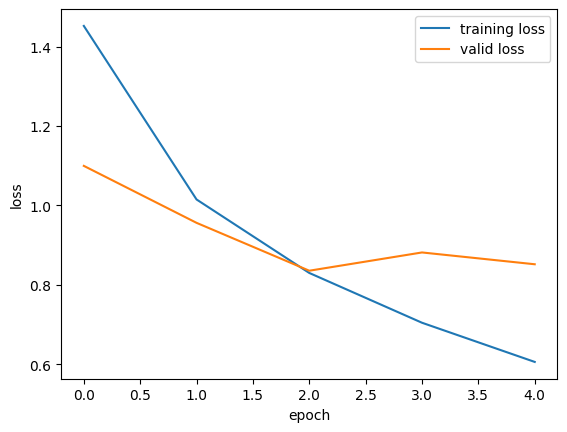

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

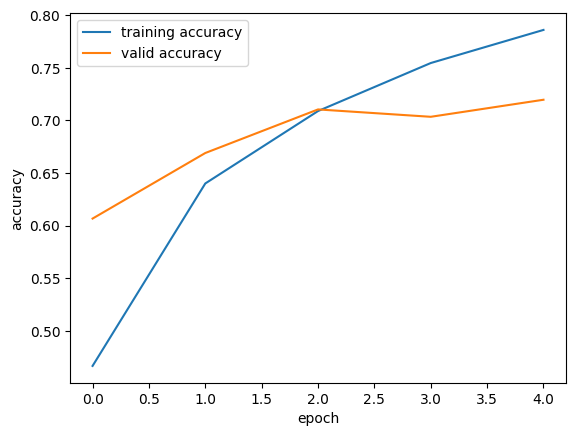

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='valid accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
import cv2
import os

In [ ]:
imgs = os.listdir(r'/content/Images')

In [ ]:
imgs

['dog.png',
 'automobile.png',
 'frog.png',
 'cat.png',
 'ship.png',
 'horse.png',
 'truck.png',
 'airplane.png',
 'deer.png',
 'bird.png']

In [ ]:
images = []
for img in imgs:
    im = cv2.imread(r'/content/Images/'+img)
    # print(type(dig))
    im = cv2.resize(im, (32,32))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im/255
    #dig = np.abs(dig-1)
    # print(dig)
    images.append(im)

In [ ]:
images[0].shape

(32, 32, 3)

In [ ]:
predicted = np.argmax(model.predict(images[0].reshape(1, 32, 32, 3)), axis=1)[0]

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


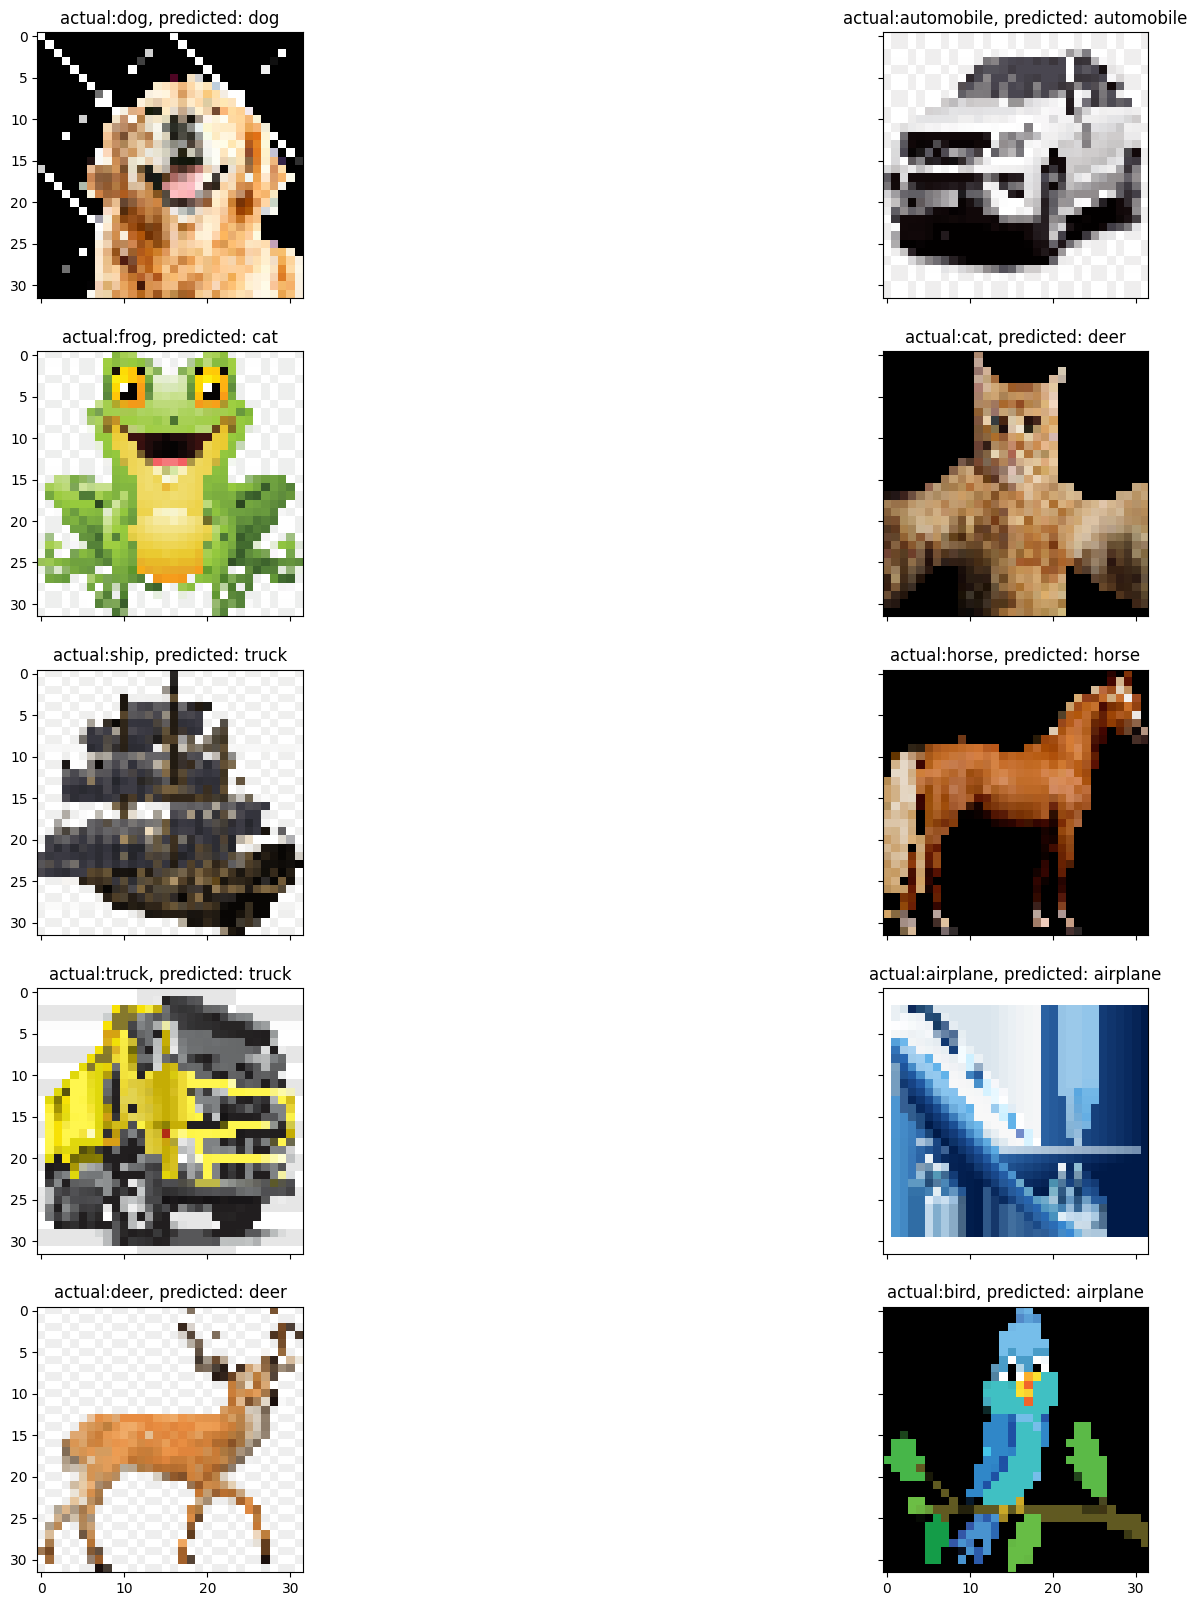

In [ ]:
fig, ax = plt.subplots(nrows=int(len(images)//2), ncols=2, sharex=True, sharey=True, figsize=(20,20))
ax = ax.flatten()

for i in range(len(images)):
    actual = imgs[i].split('.')[0]
    predicted = np.argmax(model.predict(images[i].reshape(1, 32, 32, 3)), axis=1)[0]
    ax[i].imshow(images[i],cmap='Greys')
    ax[i].set_title(f'actual:{actual}, predicted: {class_names[predicted]}')
# plt.tight_layout()
plt.show()